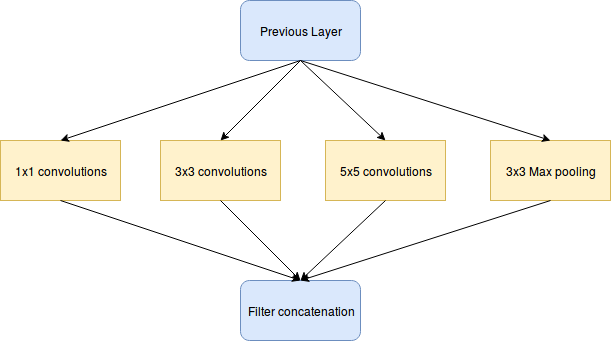

In [9]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, concatenate, Input, Activation
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import plot_model

In [4]:
def inception_module(x, f1, f2, f3):
    # 1x1 conv
    conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(x)
    # 3x3 conv
    conv3 = Conv2D(f1, (3,3), padding='same', activation='relu')(x)
    # 5x5 conv
    conv5 = Conv2D(f1, (5,5), padding='same', activation='relu')(x)
    # 3x3 max pooling
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(x)
    # concatenate filters
    out = concatenate([conv1, conv3, conv5, pool])
    return out

In [7]:
# Downloading Inception V3 Imagenet Weights
tf.keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)


96116736/96112376 [==============================] - 17s 0us/step


In [8]:
img_input = Input(shape=(299,299,3))
classes = 1000
WEIGHTS_PATH = 'inception_v3_weights_tf_dim_ordering_tf_kernels.h5'
channel_axis=3

In [10]:
def conv2d_bn(x, filters, num_row, num_col, padding='same', strides=(1,1)):
    
    x = Conv2D(filters, (num_row,num_col), strides=strides, padding=padding)(x)
    x = BatchNormalization(axis=3, scale=False)(x)
    x = Activation('relu')(x)
    return x

### Building a model layer by layer

In [ ]:
# input image size: 299 x 299 x 3
x = conv2d_bn(img_input, 32, 3, 3, strides=(2,2), padding='valid')
x = conv2d_bn(x, 32, 3, 3, padding='valid')
x = conv2d_bn(x, 64, 3, 3)
x = MaxPooling2D((3,3), strides=(2,2))(x)

x = conv2d_bn(x, 80, 1, 1, padding='valid')
x = conv2d_bn(x, 192, 1, 1, padding='valid')

x = MaxPooling2D((3,3), strides=(2,2))(x)


x = inc_block_a(x)
x = inc_block_a(x)
x = inc_block_a(x)

x = reduction_block_a(x)